In [1]:
## libraries

import pandas as pd
import numpy as np 

## addtional libraries
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import  StandardScaler

In [2]:
# import libraries
import pandas as pd
import numpy as np
import warnings
import glob
warnings.filterwarnings('ignore')
from math import radians, cos, sin, asin, sqrt

import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

In [3]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [4]:
## function definition: haversine distance
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [5]:
def q75(x):
    return x.quantile(0.75)

### squeeze data

In [6]:
#reading raw data
#df_bfrDbscan=pd.read_csv(r'Z:\Roushan_Data\LWP verification\75_user_output\75_user_raw_data.csv')
df_bfrDbscan=pd.read_csv(r'Z:\Gaurav\550_users\final_550_28_days.csv')

In [7]:
#user 63
#user_50 = df_bfrDbscan[df_bfrDbscan['imsi'].isin(['OUSb.SASKtA8YNhH9eFtJhnne+cd81D8WHHhlF8ASFSKCMCC47YYyZn5EWUQfApj','OXSvKUCnGVsHcqXOmLTbNwcVnPFFrPVko.jtTm+RMOIZ3u8QrRsMXp0.OGYF1dmQ','OZbUj8HXKfBpDGpMajoKw93V0xmEYDsFGk6Of5rVlx6EABKZ9OUnLO+GE+n67ap6','Oo27Uf6QAkDs3AIrDsEEPPyD7bYDhDz7Y4XndEOxpQIXt9plJiRXiprKgsHAnCX6','P5JDCfdnXOQr0n3IllirF1KkalubmUw8J6R9F6NkkRVpKu4Z4qnVmXeJi+k+k.oZ','PB6+qkTSOSbnXk9Q3P99lckgxY3g2SXZItyGojqkUhyf3SBc8X9TqVEKYT5X4Vjb','PH1.P8Oya3K7Cm1ezFviryYNJjrZUYVDuNRsOAnIt036T1zHQTl..GEBJ16vZKIp','PqGpcMlVOi+DGdLJ0C4cyCvX.J61Uhm+j5Dg0fBOG0Q8bNQEy7hgcEtfuP4hU9Ht','Ps7xgjfw33bV3jyl3iozSaU3he9h9iUXxyCR1VjSVhfoZch+qJJw0iquLy6i9mX8','PseBxJIaLFGEYjONQijwhBHznR3TTZ8ije7LxwePs+wBXBcxtG8PqX6P3IorzXpN','QCYJ19NqZq8Y3nC2aL.bTqiU7GXQxka5yFe2ZJ6Dbq0mCwF+50+hr4.oQGpg1LYb','QYKFiaGypxEucX0NKIiBgZ+BlG4XbJHgkYmYV7xBSoLu+y.ed4yuljSllWNU3Wjx','+mus3rWKP+.+WrvuOcc21.8RoEUb2oGaVT.D5I9zysTtYH3jn1M6um.bpP29ayaP','.C0rFtK9EziD36A+b56fX8lWDWGPqsnBUlXroKkgQ7ygKzX2JvlA8D0jSsvBqafw','0jnpRzLroeuA2CAmJpWl.oqXcu4NRnCtJVGeXVfXbCy5yhw+7OZbgn.5M8WyS+sB','+fg7ciV5t67m1.aNzbLF7asv6xJRIGdjHWRitfV+l2PVhNRsAmwRzsv+3Tmca3o6','.ynX1HSJrZxRyi1FlPHP4yfLIY1mWHXahUeTH8qbOzFAS4gffHxXuchBTJKdBMPV','0Jopug2Yi0OLvQj+DCEJ02NMhPAhUJJYohZLgnnzip7sJ4jsz7hsFMdfoOnfy7kd','0apV60OMssuANQxX9p6Z8LOFZdhNPm8mxgqs6TN4uxRIrm0Efkn3LSnDHK9bknjW','.SPy1ISOvuIoQ3sb+pwUCE7jQ6CMmevU589fxtgMN.777lvgcIc4CFeK1u88QQ4l','.NvBFSNepFvRYMb8CDplghMehuhA9N.LrDgQbjgnFW0VEGXQqoPkTNfDrfW0XR2i','.oqYocF5IrBKaYYUU1X+kyMAA5Oj40lXgvwqMjCwpDwviWi+KLAb7kPyFgMuOujX','.k9gJ3YKtUdAzuG44IUdn.gYdJIXYmPPXIMafKm56PowK9yeXQmo.Mo256MzYvOw','B8BOyB8MPcocvdPb5HhjEmH6APF2W+zx3rIV58S5QFWtx3d6Obp0lokSyggp.nzZ','BHmEOe+QKil9hMFcvG7OlcR2wlaQ2qHetxlADZRSZH4sA03kG521ZiKkpmH3bEpC','C.hfsq75WhlBDyezsZDkdB27SEjNUntO0+nM1vzjbiXffPIW.DJP+vq9iqbLP8s1','CfZwPqrMhLNJw3vh6Lce2d2iEITR7muvpIhTh1o5WaJyjcd3nw5DTGVVc.Jen6xT','Co0ffQ7.TGLqrwQDJOM.yAsYIjboLiIAHC73RQr.7za.VvvSeDhECEOpaZsXh56A','CsjJ38JX4TziG.NSZDgs9MqIXx5xdwXXrHjablNJC8VUl8hZNeLUdgGbR+fhmQss','D24TF0IruKw2VeBQ+4fVH7LNIs3mVdczu2JLfu4wnoPRXX6md09qXoTx.n.vAb.p','D6DfQRDsAds0oarJSX58DIWcB.j28Qyy0KeMgjlOYxAOfK+IwM3VnP.zUz8mtA6j','DIiehg.mgdYz6FnIO0vW4kJek95mUDKAQ7fNhCYemkA6JP71LArg7UcrzyqNOpdK','Dcx3QOsDs+Y2wldxMIaygOenscI9KqRmwJKwrYZ1BGqkLp1F2L1WdEX+zH04wpQl','EY8LrKnK+kZw.jTS3UH70O12cCtC2ZCh31MK6ESZKGN3sHuUb25jqDz95x9yVZ3+','EpvlUF5gO03SX24eYu2+vnVDfabR1B.DSswLtdgkHcS2SgcB6Xk4RMVLSvc+Y1Fc','F9sHsN3fM42m97hk2qs0+MFivI.te65b2QLO7TDe7VQoSfbM61xD+ZPH8.L2oZKK','FIGSQJfky9LxjAmjKzismzLhwiL9I8bGgm2z2pRWJ7a1H92tjq+kB4QEy+TlVmo0','FVVDDF3slbGoYsJxx2IDPmrFWxWrHGiVzsLYpqhSxF0R4aAO8POFq3ubQn05SVf2','FcaVdKXzfERR7hEpCUdWhDCptl06kpIDljDq52a+yEXyjERcMbJ4TomgZ2iSPYIy','FdpVv3RXoz8GIq+KLUrYQZAFNpDUemOZa4yyPWkaTCIxuH4Its76Y1k4tL7gK8xw','FhLsiQR24wAohGPbQBKyNQLP3zgYPZFmA8GqAzOD8Yur2qxxJGTpm2zgubmV78ef','FkBpnaxTndzvHo+lBg9+rfEb23b8Jl6YcNxXtd5.kma8qAw9MNb86aT+79z7Ievo','H78.b3qkc7fIIm9NF9V5Wr71Kj6KM3wQs0AiL7A6BBhmpT5+hbIt5Z77kScKK8OS','HJZVHXZXhWHsRPmb+ACvZtthFWROmIFIJrS+400uW5va7S.NJDQaZsGUdAeZz4dY','HneYMjoTAU3a224Yb9PCelCFQqGtS8XR+IMNpElxFxYez3L3stg8VP3+Pn.5PwRG','B8BOyB8MPcocvdPb5HhjEmH6APF2W+zx3rIV58S5QFWtx3d6Obp0lokSyggp.nzZ','OO5Nb4GIKHso1V.jjmDq+EpjVDm0xMF+Ejdz6GuhaP3eBEZscGBWoD5RaU0NEPY1','N2RS3kV6E7Q7RwMtjuG.2yi63LjTZfwPHl836P4yXvJIxymcafvsxFvJo.hLuRDi','a+xhOeCd+zhO5pseVsbpf+SKliYhbYKv9qY2H2Uvng0QZOJ3GxVHOoiutUKQP.PR','aSJDG3Kfli3H9J2di06SoQQPh9LTU80AXnOinKvUgkoA4rtuFAKar4jKakKB5tp+','bP5L8w2u5HzgcAjbx8Q6qPrpHyAsZtWH9Avo8TFJXKB62Wy4CmoL0tQBHatPrzCC','biGPUB72MgzAkQ9YWFA0LjJS3Mso98A43HpX9XAqyn7WSmaAgat2XtCK5ukMMn6s','bkMJ8Re7uXAGEgmw++AIQw9JVdaYvDzYYUjnzjTq869NMoZdWylhRGiiUxlwWIQe','by2RYKTEtzdeVpLvX.0E3GdkQmViKTZuLwgQFj8tDIea.MvDuyB0RNoswHzfS0sL','byPjZ0bxIZucW15tP2RVhaC.uJn0XI9lyHuLhpcvv2QuqdyCzQ0fOg1YdrdhEz3M','cFhKphpI9+Yb7MpO0Ssv.C.kNNmpd795A1WEsAjNNkScuikRB5lQjO1vh2zA.znj','cwVX0dLU+Rkl2pYzxrq7P0OPm8VEbjYdeMnso+vdyl+pAUnaU1NxvDLkkM4xJXml','czQ150O5UHN3mtfFWcfLPPwzo5NVc+UudZ.7zsSMcDghPSRQK9cvy5Z5yxyRMbwK','d+udwh3uQKK1yOA4+10CY4XURu08KvOEpUXw4OzGq82GWH6xsQdaIL3k8H3Xk0zE','dJYXM1A0x0lLIHCn1jPsRRCSwcYljEntxCyN3fmTdlK.lVattzoCRP1BQILVewVR','N05TabjBDVTzASbNLxCuM0GByuIhGFv6msKmHcz.3yIyVfPgWTPJSwS8Cw.WF9k4','N0kosPjvOfxN4PTlf.NRRI07znjMfFAlnh7aniIg9Tt7U7ypHKnnDSyVUUZ0+0F3','N2RS3kV6E7Q7RwMtjuG.2yi63LjTZfwPHl836P4yXvJIxymcafvsxFvJo.hLuRDi'])]

In [8]:
#user_6=user_50
user_6=df_bfrDbscan
print(user_6.shape)
print(len(user_6.imsi.unique()))

(6960109, 9)
550


### Normalizing Latitude & Longitude with 0.005

In [9]:
user_6['rounded_latitude']=((((user_6['raster_latitude'].astype(float)/0.005)).round(0))*0.005).round(3)
user_6['rounded_longitude']=((((user_6['raster_longitude'].astype(float)/0.005)).round(0))*0.005).round(3)

#user_6['rounded_latitude']=((((user_6['raster_latitude'].astype(float)/0.01)).round(0))*0.01).round(2)
#user_6['rounded_longitude']=((((user_6['raster_longitude'].astype(float)/0.01)).round(0))*0.01).round(2)
#user_6['rounded_latitude']=(((user_6['raster_latitude'].astype(float)/0.01)).round(0))*0.01
#user_6['rounded_longitude']=(((user_6['raster_longitude'].astype(float)/0.01)).round(0))*0.01


In [10]:
user_6.head(5)

,Unnamed: 0,Unnamed: 0.1,imsi,raster_latitude,raster_longitude,time_in,hour_in,duration,partition_date,rounded_latitude,rounded_longitude
0,0,0,+q2wQVBOlodMb7WvnpwVjR3BmqP5BfsOp3LEq2pvDGtlY3...,13.714848,100.527591,2020-11-10 17:06:36,17,6,2020-11-10,13.715,100.530
1,1,1,+q2wQVBOlodMb7WvnpwVjR3BmqP5BfsOp3LEq2pvDGtlY3...,13.718445,100.514629,2020-11-10 17:29:25,17,24,2020-11-10,13.720,100.515
2,2,2,.wB75jrVYupQ4C+1aCPDkh0uyf6XxL.ib7uUHbWMoFEhfB...,13.827713,100.556293,2020-11-10 15:29:25,15,29,2020-11-10,13.830,100.555
3,3,3,.wB75jrVYupQ4C+1aCPDkh0uyf6XxL.ib7uUHbWMoFEhfB...,13.832659,100.556756,2020-11-10 15:13:36,15,1,2020-11-10,13.835,100.555
4,4,4,.wB75jrVYupQ4C+1aCPDkh0uyf6XxL.ib7uUHbWMoFEhfB...,13.845250,100.524351,2020-11-10 08:25:37,8,11,2020-11-10,13.845,100.525


### Finding in distance travelled by user on daily basis by max & min lat/long
#### if distance travelled > 4km then Mobile else static

In [11]:
user_6_min=user_6.sort_values(['imsi','partition_date','raster_latitude','raster_longitude'],ascending=[True,True,True,True]).groupby(['imsi','partition_date']).head(1)
user_6_max=user_6.sort_values(['imsi','partition_date','raster_latitude','raster_longitude'],ascending=[True,True,False,False]).groupby(['imsi','partition_date']).head(1)
user_6_combined=pd.concat([user_6_min,user_6_max])
user_6_combined.sort_values(['imsi','partition_date','raster_latitude','raster_longitude'],ascending=[True,True,True,True],inplace=True)
user_6_combined['raster_latitude_shifted'] = user_6_combined.groupby(['imsi','partition_date'])['raster_latitude'].transform(lambda x: x.shift())
user_6_combined['raster_longitude_shifted'] = user_6_combined.groupby(['imsi','partition_date'])['raster_longitude'].transform(lambda x: x.shift())

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r
user_6_combined['distance'] = user_6_combined.apply(lambda row : haversine(row['raster_longitude'],row['raster_latitude'],row['raster_longitude_shifted'],row['raster_latitude_shifted']), axis = 1)
user_6_combined1=user_6_combined[user_6_combined.distance.notnull()]
user_6_combined1.loc[user_6_combined1['distance']<=4,'status']='Stationary'
user_6_combined1.loc[user_6_combined1['distance']>4,'status']='Mobile'
user_6_combined1['distance']=user_6_combined1['distance'].round(0)
user_6_1=user_6.merge(user_6_combined1[['imsi','partition_date','status','distance']],on=['imsi','partition_date'],how='left')
user_6_1.sort_values(['imsi','time_in'],inplace=True)

### Finding 98 percentile of duration for each user in each day

### different approach for percentile cal

In [12]:
df_new=user_6_1

In [13]:
df_new1=df_new.groupby(['imsi','partition_date'])['duration'].quantile(0.98).reset_index()

In [14]:
len(df_new1.partition_date.unique())

28

In [15]:
df_new1.shape

(15061, 3)

In [16]:
df_new1.head(5)

,imsi,partition_date,duration
0,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-01,1939.58
1,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,1419.20
2,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-03,1311.60
3,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-04,1497.20
4,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-05,1453.12


In [17]:
df_d=df_new1.rename(columns={'duration':'duration_98Perc'})

In [18]:
df_d.head(5)

,imsi,partition_date,duration_98Perc
0,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-01,1939.58
1,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,1419.20
2,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-03,1311.60
3,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-04,1497.20
4,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-05,1453.12


### merging of 98 percentile of duration for each user & filtering points greater than 98 percentile duration

In [19]:
#df_d=df_c.groupby(['imsi']).agg(median_time=('99_percentile','median')).reset_index()
median_time=user_6_1.merge(df_d,on=['imsi','partition_date'],how='inner')
median_time['flag']=median_time['duration']>median_time['duration_98Perc']
filtered_median_time=median_time[median_time['flag']==True]
print(filtered_median_time.shape)


(146207, 15)


In [20]:
median_time.head(10)

,Unnamed: 0,Unnamed: 0.1,imsi,raster_latitude,raster_longitude,time_in,hour_in,duration,partition_date,rounded_latitude,rounded_longitude,status,distance,duration_98Perc,flag
0,2271419,2271419,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.736881,100.568330,2020-11-01 00:00:00,0,436,2020-11-01,13.735,100.570,Stationary,1.0,1939.58,False
1,2277531,2277531,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.735083,100.570182,2020-11-01 00:07:16,0,10,2020-11-01,13.735,100.570,Stationary,1.0,1939.58,False
2,2271328,2271328,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.736432,100.569719,2020-11-01 00:07:26,0,88,2020-11-01,13.735,100.570,Stationary,1.0,1939.58,False
3,2272894,2272894,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.735532,100.569256,2020-11-01 00:08:54,0,1204,2020-11-01,13.735,100.570,Stationary,1.0,1939.58,False
4,2268544,2268544,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.738230,100.566941,2020-11-01 00:28:58,0,201,2020-11-01,13.740,100.565,Stationary,1.0,1939.58,False
5,2278499,2278499,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.735532,100.570182,2020-11-01 00:32:19,0,10,2020-11-01,13.735,100.570,Stationary,1.0,1939.58,False
6,2272675,2272675,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.735532,100.569719,2020-11-01 00:32:29,0,500,2020-11-01,13.735,100.570,Stationary,1.0,1939.58,False
7,2268408,2268408,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.735982,100.569719,2020-11-01 00:40:49,0,10,2020-11-01,13.735,100.570,Stationary,1.0,1939.58,False
8,2271329,2271329,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.736432,100.569719,2020-11-01 00:40:59,0,178,2020-11-01,13.735,100.570,Stationary,1.0,1939.58,False
9,2271066,2271066,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.735982,100.570182,2020-11-01 00:43:57,0,10,2020-11-01,13.735,100.570,Stationary,1.0,1939.58,False


In [21]:
user_6_1.shape,median_time.shape

((6960109, 13), (6960109, 15))

In [22]:
len(filtered_median_time.partition_date.unique())

28

In [23]:
#concatinating lat-long
filtered_median_time['raster_lat_long']=filtered_median_time['raster_latitude'].astype(str)+"_"+filtered_median_time['raster_longitude'].astype(str)
filtered_median_time['rounded_lat_long']=filtered_median_time['rounded_latitude'].astype(str)+"_"+filtered_median_time['rounded_longitude'].astype(str)
# median_time['raster_lat_long']=median_time['raster_latitude'].astype(str)+"_"+median_time['raster_longitude'].astype(str)
# median_time['rounded_lat_long']=median_time['rounded_latitude'].astype(str)+"_"+median_time['rounded_longitude'].astype(str)

### Ranking each filtered point  per user per date

In [24]:
filtered_median_time['Rank']=filtered_median_time.groupby(['imsi','partition_date','rounded_lat_long'])['duration'].rank('dense',ascending=False)

In [25]:
filtered_median_time.shape

(146207, 18)

In [26]:
filtered_median_time.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'imsi', 'raster_latitude',
       'raster_longitude', 'time_in', 'hour_in', 'duration', 'partition_date',
       'rounded_latitude', 'rounded_longitude', 'status', 'distance',
       'duration_98Perc', 'flag', 'raster_lat_long', 'rounded_lat_long',
       'Rank'],
      dtype='object')

In [27]:
len(filtered_median_time.rounded_lat_long.unique())

12218

In [28]:
filtered_median_time.sort_values(['imsi','partition_date','rounded_lat_long','Rank'],ascending=[True,True,True,True])

,Unnamed: 0,Unnamed: 0.1,imsi,raster_latitude,raster_longitude,time_in,hour_in,duration,partition_date,rounded_latitude,rounded_longitude,status,distance,duration_98Perc,flag,raster_lat_long,rounded_lat_long,Rank
263,2272455,2272455,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.737331,100.568793,2020-11-01 23:02:34,23,3445,2020-11-01,13.735,100.570,Stationary,1.0,1939.58,True,13.737331_100.568793,13.735_100.57,1.0
226,2272904,2272904,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.735532,100.569256,2020-11-01 17:26:06,17,2726,2020-11-01,13.735,100.570,Stationary,1.0,1939.58,True,13.735532_100.569256,13.735_100.57,2.0
230,2271424,2271424,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.736881,100.568330,2020-11-01 18:19:46,18,2215,2020-11-01,13.735,100.570,Stationary,1.0,1939.58,True,13.736881_100.56833,13.735_100.57,3.0
245,2271150,2271150,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.737331,100.570182,2020-11-01 21:14:36,21,2200,2020-11-01,13.735,100.570,Stationary,1.0,1939.58,True,13.737331_100.570182,13.735_100.57,4.0
259,2272454,2272454,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.737331,100.568793,2020-11-01 22:28:44,22,1970,2020-11-01,13.735,100.570,Stationary,1.0,1939.58,True,13.737331_100.568793,13.735_100.57,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960046,3193776,1329815,zyZCfdJiPWPioM8o7I95VT3efATg9jVC1X.+zq2ND78WyN...,13.324992,99.866975,2020-11-26 21:41:51,21,5432,2020-11-26,13.325,99.865,Mobile,48.0,4563.20,True,13.324992_99.866975,13.325_99.865,2.0
6959925,3192682,1328721,zyZCfdJiPWPioM8o7I95VT3efATg9jVC1X.+zq2ND78WyN...,13.537232,100.242420,2020-11-26 09:28:32,9,4765,2020-11-26,13.535,100.240,Mobile,48.0,4563.20,True,13.537232_100.24242,13.535_100.24,1.0
6959989,3194315,1330354,zyZCfdJiPWPioM8o7I95VT3efATg9jVC1X.+zq2ND78WyN...,13.536783,100.242883,2020-11-26 14:48:02,14,5569,2020-11-26,13.535,100.245,Mobile,48.0,4563.20,True,13.536783_100.242883,13.535_100.245,1.0
6960072,3252720,1388759,zyZCfdJiPWPioM8o7I95VT3efATg9jVC1X.+zq2ND78WyN...,13.403683,100.010024,2020-11-27 07:51:26,7,58113,2020-11-27,13.405,100.010,Mobile,19.0,40975.08,True,13.403683_100.010024,13.405_100.01,1.0


### Taking Max duration point for each user for each date from filtered >98 percentile duration point

In [29]:
#taking max duration point per user per date
uniq_df=filtered_median_time[filtered_median_time.Rank==1]

In [30]:
uniq_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'imsi', 'raster_latitude',
       'raster_longitude', 'time_in', 'hour_in', 'duration', 'partition_date',
       'rounded_latitude', 'rounded_longitude', 'status', 'distance',
       'duration_98Perc', 'flag', 'raster_lat_long', 'rounded_lat_long',
       'Rank'],
      dtype='object')

In [31]:
uniq_df.shape

(54783, 18)

In [32]:
uniq_df2=uniq_df

### Merging of uniq or major points Data Frame to original dateframe to find all point wrt rounded lat-long

In [33]:
user_6_5=user_6_1.merge(uniq_df2[['imsi','partition_date','rounded_latitude','rounded_longitude','raster_latitude','raster_longitude']],on=['imsi','partition_date','rounded_latitude','rounded_longitude'],how='left')
import numpy as np
user_6_5['updated_latitude'] = np.where(user_6_5['raster_latitude_y'].isnull(), user_6_5['raster_latitude_x'],user_6_5['raster_latitude_y'])
user_6_5['updated_longitude'] = np.where(user_6_5['raster_longitude_y'].isnull(), user_6_5['raster_longitude_x'],user_6_5['raster_longitude_y'])




In [34]:
user_6_5.shape

(6965373, 17)

In [35]:
user_6_5.head(5)

,Unnamed: 0,Unnamed: 0.1,imsi,raster_latitude_x,raster_longitude_x,time_in,hour_in,duration,partition_date,rounded_latitude,rounded_longitude,status,distance,raster_latitude_y,raster_longitude_y,updated_latitude,updated_longitude
0,2271419,2271419,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.736881,100.568330,2020-11-01 00:00:00,0,436,2020-11-01,13.735,100.570,Stationary,1.0,13.737331,100.568793,13.737331,100.568793
1,2277531,2277531,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.735083,100.570182,2020-11-01 00:07:16,0,10,2020-11-01,13.735,100.570,Stationary,1.0,13.737331,100.568793,13.737331,100.568793
2,2271328,2271328,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.736432,100.569719,2020-11-01 00:07:26,0,88,2020-11-01,13.735,100.570,Stationary,1.0,13.737331,100.568793,13.737331,100.568793
3,2272894,2272894,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.735532,100.569256,2020-11-01 00:08:54,0,1204,2020-11-01,13.735,100.570,Stationary,1.0,13.737331,100.568793,13.737331,100.568793
4,2268544,2268544,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.738230,100.566941,2020-11-01 00:28:58,0,201,2020-11-01,13.740,100.565,Stationary,1.0,13.737781,100.563700,13.737781,100.563700


### Windowing function to club same lat-long point

In [36]:
user_6_5['time_in']=pd.to_datetime(user_6_5['time_in'])
user_6_5['ts'] = user_6_5.time_in.values.astype(np.int64) // 10 ** 9

In [37]:
user_6_5['updated_lat_long']=user_6_5['updated_latitude'].astype(str)+"_"+user_6_5['updated_longitude'].astype(str)

In [38]:
user_6_5.sort_values(['imsi','time_in'],inplace=True)

In [39]:
user_6_5['prev_updated_lat_long'] = user_6_5.groupby(['imsi','partition_date'])['updated_lat_long'].shift(1)

user_6_5['change'] = np.where(user_6_5['prev_updated_lat_long'] != user_6_5['updated_lat_long'], 1, 0)

user_6_5['event'] = user_6_5.groupby(['imsi','partition_date'])['change'].cumsum()

# df_data.to_csv('updated_change_events_merged_data.csv', index=False)

user_6_5_fil = user_6_5[user_6_5['change'] == 1]



user_6_5_fil['ts_out'] = user_6_5_fil.groupby(['imsi','partition_date'])['ts'].shift(-1)

user_6_5_fil['hour_out'] = user_6_5_fil.groupby(['imsi','partition_date'])['hour_in'].shift(-1)

user_6_5_fil['updated_latitude_out'] = user_6_5_fil.groupby(['imsi','partition_date'])['updated_latitude'].shift(-1)
user_6_5_fil['updated_longitude_out'] = user_6_5_fil.groupby(['imsi','partition_date'])['updated_longitude'].shift(-1)
#calculating new duration after sqeezing
user_6_5_fil['duration_new'] = user_6_5_fil['ts_out'] - user_6_5_fil['ts']


In [40]:
#handling last duration point. 
user_6_5_fil['duration_new']=np.where(user_6_5_fil['duration_new'].isnull(),user_6_5_fil['duration'],user_6_5_fil['duration_new'])

In [41]:
#before & after squezzing shape
user_6_5.shape,user_6_5_fil.shape

((6965373, 22), (3524574, 27))

In [42]:
user_6_5_fil.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'imsi', 'raster_latitude_x',
       'raster_longitude_x', 'time_in', 'hour_in', 'duration',
       'partition_date', 'rounded_latitude', 'rounded_longitude', 'status',
       'distance', 'raster_latitude_y', 'raster_longitude_y',
       'updated_latitude', 'updated_longitude', 'ts', 'updated_lat_long',
       'prev_updated_lat_long', 'change', 'event', 'ts_out', 'hour_out',
       'updated_latitude_out', 'updated_longitude_out', 'duration_new'],
      dtype='object')

In [43]:
# user_6_5.to_csv(r'Z:\Roushan_Data\LWP verification\Dbscan\new_output\combining_uniq_major_point\user63_old_norm_dura_occu_square_before_windowing_squeezing.csv')


In [44]:
#user_6_5_fil.to_csv(r'Z:\Sachin\lwp\445 User new Data\445_user_squeezed_98_perce.csv')

In [45]:
#user_6_5_fil=pd.read_csv(r'Z:\Sachin\lwp\445 User new Data\445_user_squeezed_98_perce.csv')

# PREPROCESSING

In [46]:
## import libraries
import warnings
import glob
warnings.filterwarnings('ignore')
from math import radians, cos, sin, asin, sqrt
import pandas as pd 
import numpy as np

## function definition: haversine distance
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

## Input Data : Squeezed before aggregation

# Base550users28days_df=pd.read_csv(r'Z:\Roushan_Data\LWP verification\Dbscan\new_output\combining_uniq_major_point\user_63_squeezed_98_perce_only_per_day_with_windowing_raw.csv')
Base550users28days_df=user_6_5_fil
Base550users28days_df=Base550users28days_df[['imsi','partition_date','time_in','hour_in','duration_new','updated_latitude','updated_longitude']]
Base550users28days_df.rename(columns={'updated_latitude':'raster_latitude','updated_longitude':'raster_longitude'},inplace=True)
Base550users28days_df


a=['2020-11-01','2020-11-07', '2020-11-08','2020-11-14','2020-11-15','2020-11-21', '2020-11-22','2020-11-28']
Base550users28days_df['weekend/days']= Base550users28days_df['partition_date'].apply(lambda x: 'weekend' if x in a else 'weekday')

BaseWeekdays_df=Base550users28days_df[Base550users28days_df['weekend/days']=='weekday'].reset_index(drop=True)

BaseWeekdays_df.head()

# BaseWeekdays_AddedFeatures_df=BaseWeekdays_df
imsi_unique=BaseWeekdays_df.imsi.unique()
l2=[]

for imsi in imsi_unique:
    imsi_df= BaseWeekdays_df[BaseWeekdays_df['imsi']==imsi]
    dates=imsi_df.partition_date.unique()
    for date in dates:
        dt= imsi_df[imsi_df['partition_date']==date]
        min_lat=dt.raster_latitude.min()
        min_long=dt.raster_longitude.min()
        max_long=dt.raster_longitude.max()
        max_lat=dt.raster_latitude.max()
        try:
            u=dt.raster_latitude.median()
            v=dt.raster_longitude.median()
#             u_10=np.percentile(dt.raster_latitude,10)
#             u_90=np.percentile(dt.raster_latitude,90)
#             v_10=np.percentile(dt.raster_longitude,10)
#             v_90=np.percentile(dt.raster_longitude,90)        
            hv=haversine(min_long,min_lat,max_long,max_lat)
#             l2.append((imsi,date,hv,u,v,u_10,u_90,v_10,v_90))
            l2.append((imsi,date,hv,u,v))
        
        except:
            pass
l=pd.DataFrame(l2) 
# l.columns=['imsi','date','dist','median_lat','median_long','lat_10','lat_90','long_10','long_90']
l.columns=['imsi','date','dist','median_lat','median_long']

BaseDaily_df=pd.DataFrame()
for i in imsi_unique:
    l2=l[l['imsi']==i]
    l2['lat']=l2['median_lat'].quantile(0.6)
    l2['long']=l2['median_long'].quantile(0.6)
#     l2['lat_68']=l2['median_lat'].quantile(0.68)
#     l2['long_68']=l2['median_long'].quantile(0.68)
    l2['dist_hav_60-50']=l2.apply(lambda row : haversine(row['median_long'],row['median_lat'],row['long'],row['lat']), axis = 1)
#     l2['dist_hav_60-10']=l2.apply(lambda row : haversine(row['long_10'],row['lat_10'],row['long'],row['lat']), axis = 1)
#     l2['dist_hav_60-90']=l2.apply(lambda row : haversine(row['long_90'],row['lat_90'],row['long'],row['lat']), axis = 1)
#     l2['dist_hav_68-10']=l2.apply(lambda row : haversine(row['long_10'],row['lat_10'],row['long_68'],row['lat_68']), axis = 1)
#     l2['dist_hav_68-50']=l2.apply(lambda row : haversine(row['median_long'],row['median_lat'],row['long_68'],row['lat_68']), axis = 1)
#     l2['dist_hav_68-90']=l2.apply(lambda row : haversine(row['long_90'],row['lat_90'],row['long_68'],row['lat_68']), axis = 1)
    tx=l2
    tx.reset_index(drop=True,inplace=True)
    BaseDaily_df=pd.concat([BaseDaily_df,tx],axis=0)    
BaseDaily_df.shape

# Extreme Mobile(Outlier)
b1=BaseDaily_df.groupby(['imsi']).agg(median_dist_hav=('dist_hav_60-50','median'),std_dist_hav=('dist_hav_60-50','std')).reset_index() # calculate: median and standard deviation of --> distance between median and 60th percentile points on date
BaseDaily_df=BaseDaily_df.merge(b1, on='imsi', how='left') ## add column to main data (kp5)
BaseDaily_df['Extreme_mobile']=BaseDaily_df['median_dist_hav'].apply(lambda x: 1 if x>=60 else 0) ## if above kpi > 60, then extreme mobile


# 2nd Outlier (2 Location)M
BaseDaily_df['2_location']= 0
for i in range(0,BaseDaily_df.shape[0]):
    if ((BaseDaily_df['median_dist_hav'].iloc[i]+BaseDaily_df['std_dist_hav'].iloc[i])>30):
        if (BaseDaily_df['dist_hav_60-50'].iloc[i]>(BaseDaily_df['median_dist_hav'].iloc[i]+BaseDaily_df['std_dist_hav'].iloc[i])):
            BaseDaily_df['2_location'].iloc[i]= 1

# Static/Mobile TAG per IMSI
# Monthly mobile tag
# mobile, Mobile Static, static User (monthly tag)

BaseDaily_df['new_mobility_acc_dist']=BaseDaily_df['dist'].apply(lambda x:"Static" if x<=3 else "Mobile")
c1=BaseDaily_df.groupby(['imsi','new_mobility_acc_dist']).agg(
    static_days=('imsi','count')).reset_index()
c1=c1[c1['new_mobility_acc_dist']=='Static']
c1['user_type']=c1['static_days'].apply(lambda x:"Static" if x>=14 else "Static-Mobile" if x>=6 else "Mobile")
del c1['new_mobility_acc_dist']
BaseDaily_df=BaseDaily_df.merge(c1,on='imsi',how='left')
BaseDaily_df['static_days']=BaseDaily_df['static_days'].fillna(0)
BaseDaily_df['user_type']=BaseDaily_df['user_type'].fillna("Mobile")
BaseDaily_df.shape

### Daily Abnormality Tag
kp3=BaseDaily_df
ww2=pd.DataFrame()
for i in imsi_unique :
    ww=kp3[kp3['imsi']==i]
    if ww['dist'].median()<=5 :
        ww1=ww[(ww['dist'] >0) & (ww['dist'] <10)]
    elif(( ww['dist'].median()>5) and (ww['dist'].median()<=10)):
         ww1=ww[(ww['dist'] >0) & (ww['dist'] <20)]
    elif(( ww['dist'].median()>10) and (ww['dist'].median()<=20)):
         ww1=ww[(ww['dist'] >0) & (ww['dist'] <35)]
    elif(( ww['dist'].median()>20) and (ww['dist'].median()<=30)):
         ww1=ww[(ww['dist'] >0) & (ww['dist'] <45)]
    elif(( ww['dist'].median()>30) and (ww['dist'].median()<=40)):
        ww1= ww[(ww['dist'] >0) & (ww['dist'] <50)]
    elif(( ww['dist'].median()>40) and(ww['dist'].median()<=50)):
         ww1=ww[(ww['dist'] >0) & (ww['dist'] <70)]
    elif( ww['dist'].median()>50):
         ww1=ww[(ww['dist'] >0) & (ww['dist'] <150)]
    ww2=pd.concat([ww2,ww1],axis=0)   
ww2['daily_abn']=0
ww2=ww2[['imsi','date','daily_abn']]

BaseFinal_df=kp3.merge(ww2,on=['imsi','date'],how='left')
BaseFinal_df['daily_abn']=BaseFinal_df['daily_abn'].fillna(1)
BaseFinal_df.shape


# Outlier Tag

# static
d_static=BaseFinal_df[BaseFinal_df['user_type'] =='Static']
d_static['outlier']=d_static['dist'].apply(lambda x: 1 if x>3 else 0)

# static-mobile
d_staticMobile=BaseFinal_df[BaseFinal_df['user_type'] =='Static-Mobile']

d_staticMobile=d_staticMobile[(d_staticMobile['new_mobility_acc_dist']!='Static')]
d_staticMobile=d_staticMobile[(d_staticMobile['Extreme_mobile']!=1)]
d_staticMobileDIST=d_staticMobile.groupby(['imsi']).agg(
    med=('dist','median'),
    mean=('dist','mean'),
    std=('dist','std')).reset_index().fillna(0)
d_staticMobileDIST['sum']=d_staticMobileDIST['med']+d_staticMobileDIST['std']
d_staticMobile=d_staticMobile.merge(d_staticMobileDIST[['imsi','sum','std']],on='imsi',how='left')
d_staticMobile['outlier']= (d_staticMobile['std']>20) & (d_staticMobile['dist']>d_staticMobile['sum'])
d_staticMobile.drop(['sum','std'],axis=1)

## mobile
d_mobile=BaseFinal_df[BaseFinal_df['user_type'] =='Mobile']
d_mobile['outlier']= d_mobile['daily_abn']

ConcatData=pd.concat([d_static,d_staticMobile,d_mobile],axis=0)
FinalData=BaseFinal_df.merge(ConcatData[['imsi','date','outlier']],on=['imsi','date'],how='left')
FinalData['outlier1']= ((FinalData['outlier']==1) | (FinalData['2_location']==1))*1


### MEAN distance monthly, calculated after removing outliers1
distdf=FinalData[FinalData['outlier1']==0]
distdf=distdf[['imsi','date','dist']].drop_duplicates()
meandistmonthly=distdf.groupby(['imsi']).agg(dist_avg=('dist','mean')).reset_index()
FinalData=FinalData.merge(meandistmonthly,on='imsi',how='left')

# FinalData.head()


## MERGING BACK WITH SQUEEZE
RawFinal=FinalData[['imsi', 'date', 'dist', 'median_lat', 'median_long','user_type','outlier1','dist_avg']]
RawFinal=RawFinal[RawFinal['outlier1']==0]
RawFinal.rename(columns={'date':'partition_date'},inplace=True)

## Merge raw data with squeeze data to get updated lat-long, duration, status, weekday_tag , hour_in
squeeze_final=Base550users28days_df.merge(RawFinal,on=['imsi', 'partition_date'],how='left')
squeeze_final['duration_seconds']=squeeze_final['duration_new']
squeeze_final['duration_minutes']=squeeze_final['duration_new']/60
squeeze_final=squeeze_final.rename(columns={'raster_latitude':'updated_latitude','raster_longitude':'updated_longitude'})
squeeze_final=squeeze_final[['imsi', 'partition_date', 'hour_in','dist','user_type', 'outlier1', 'dist_avg', 'updated_latitude', 'updated_longitude','duration_seconds', 'duration_minutes',
        'weekend/days']]
print(squeeze_final.shape)
print('unique imsi: ',len(squeeze_final.imsi.unique()))

print(squeeze_final.shape,RawFinal.shape)
squeeze_final.dropna(axis=0,inplace=True)
print(squeeze_final.shape,RawFinal.shape)
squeeze_final.head()

(3524574, 12)
unique imsi:  550
(3524574, 12) (9516, 8)
(2117921, 12) (9516, 8)


,imsi,partition_date,hour_in,dist,user_type,outlier1,dist_avg,updated_latitude,updated_longitude,duration_seconds,duration_minutes,weekend/days
86,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,0,15.789797,Mobile,0.0,14.254778,13.734183,100.569719,5313.0,88.550000,weekday
87,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,1,15.789797,Mobile,0.0,14.254778,13.731036,100.573422,913.0,15.216667,weekday
88,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,1,15.789797,Mobile,0.0,14.254778,13.734183,100.569719,597.0,9.950000,weekday
89,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,1,15.789797,Mobile,0.0,14.254778,13.737781,100.569256,305.0,5.083333,weekday
90,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,1,15.789797,Mobile,0.0,14.254778,13.734183,100.569719,1951.0,32.516667,weekday


# DBSCAN

In [47]:
# Calculating Distance Clusters using DBscan
IMSI=squeeze_final.imsi.unique()
sc=StandardScaler()
df_final_gret_10_weekday=pd.DataFrame()

for imsi in IMSI:
    imsi_df=squeeze_final[squeeze_final['imsi']==imsi].reset_index(drop=True)
    imsi_df['log_dur']=np.log2(imsi_df['duration_minutes'])
    quantile98=imsi_df['log_dur'].quantile(0.975)
    imsi_df['log_dur'].values[imsi_df['log_dur'] > quantile98 ] = quantile98
    
    t5=pd.DataFrame(sc.fit_transform(imsi_df[['updated_latitude','updated_longitude']]))
    t5.columns=['updated_latitude','updated_longitude']
    t5['log_dur']=imsi_df['log_dur']
    t5.replace([np.inf, -np.inf], np.nan, inplace=True)
    t5.fillna(0,inplace=True,axis=0)
    
    try:
        if (imsi_df['dist_avg'].iloc[0]<=5) and (imsi_df['user_type'].iloc[0]!='Static'):
            dbscan=DBSCAN(eps=0.3, min_samples=10)
            model=dbscan.fit(t5)
            if len(set(model.labels_))<2:
                dbscan=DBSCAN(eps=0.15, min_samples=2)
                model=dbscan.fit(t5)
            imsi_df['clusters']=model.labels_
            df_final_gret_10_weekday=pd.concat([df_final_gret_10_weekday,imsi_df],axis=0)

        elif (imsi_df['dist_avg'].iloc[0]>5) and (imsi_df['user_type'].iloc[0]!='Static') and (imsi_df['dist_avg'].iloc[0]<=11):
            dbscan=DBSCAN(eps=0.17, min_samples=10)
            model=dbscan.fit(t5)
            if len(set(model.labels_))<2:
                dbscan=DBSCAN(eps=0.17, min_samples=2)
                model=dbscan.fit(t5)
            imsi_df['clusters']=model.labels_
            df_final_gret_10_weekday=pd.concat([df_final_gret_10_weekday,imsi_df],axis=0)

        elif (imsi_df['dist_avg'].iloc[0]>11) and (imsi_df['user_type'].iloc[0]!='Static') and ( imsi_df['dist_avg'].iloc[0]<=15):
            dbscan=DBSCAN(eps=0.1, min_samples=10)
            model=dbscan.fit(t5)
            if len(set(model.labels_))<2:
                dbscan=DBSCAN(eps=0.5, min_samples=5)
                model=dbscan.fit(t5)
            if len(set(model.labels_))>=20:
                dbscan=DBSCAN(eps=0.12, min_samples=10)
                model=dbscan.fit(t5)
            imsi_df['clusters']=model.labels_
            df_final_gret_10_weekday=pd.concat([df_final_gret_10_weekday,imsi_df],axis=0)

        elif (imsi_df['dist_avg'].iloc[0]>15) and (imsi_df['dist_avg'].iloc[0]<=22) and (imsi_df['user_type'].iloc[0]!='Static'):
            dbscan=DBSCAN(eps=0.1, min_samples=12)
            model=dbscan.fit(t5)
            if len(set(model.labels_))<2:
                dbscan=DBSCAN(eps=0.15, min_samples=5)
                model=dbscan.fit(t5)
            imsi_df['clusters']=model.labels_
            df_final_gret_10_weekday=pd.concat([df_final_gret_10_weekday,imsi_df],axis=0)

        elif (imsi_df['dist_avg'].iloc[0]>22) and (imsi_df['dist_avg'].iloc[0]<=40) and (imsi_df['user_type'].iloc[0]!='Static'):
            dbscan=DBSCAN(eps=0.05, min_samples=20)
            model=dbscan.fit(t5)
            if len(set(model.labels_))<2:
                dbscan=DBSCAN(eps=0.15, min_samples=5)
                model=dbscan.fit(t5)
            imsi_df['clusters']=model.labels_
            df_final_gret_10_weekday=pd.concat([df_final_gret_10_weekday,imsi_df],axis=0)

        elif (imsi_df['dist_avg'].iloc[0]>40) and (imsi_df['user_type'].iloc[0]!='Static'):
            dbscan=DBSCAN(eps=0.08, min_samples=20)
            model=dbscan.fit(t5)
            if len(set(model.labels_))<2:
                dbscan=DBSCAN(eps=0.15, min_samples=5)
                model=dbscan.fit(t5)
            imsi_df['clusters']=model.labels_
            df_final_gret_10_weekday=pd.concat([df_final_gret_10_weekday,imsi_df],axis=0)

    except:
        print("IMSi : " + imsi+ "was not processed")
        
print(df_final_gret_10_weekday.shape)
print('unique clusters: ',df_final_gret_10_weekday.clusters.unique())
df_final_gret_10_weekday.head()

(1940820, 14)
unique clusters:  [  0   1   2  -1  32   3   4  23  43   5   6   7  38   8   9  10  11  12
  13  14  15  16  17  18  19  21  20  22  24  25  40  27  28  26  41  39
  44  29  30  31  33  37  36  34  47  35  45  42  46  64  65  61  53  68
  63  50  51  48  52  54  69  55  49  60  58  56  57  59  67  62  66  70
  71  73  80  78  76  77  72  75  74  79  94  84  87  93  88  82  91  86
  92  89  81  83  85  90 136 134  98 108 117 118 119 111 110 103  95  96
 127  97 101 100  99 133 104 102 105 106 135 109 107 112 113 115 114 116
 122 120 121 137 124 123 125 126 138 128 129 130 131 132]


,imsi,partition_date,hour_in,dist,user_type,outlier1,dist_avg,updated_latitude,updated_longitude,duration_seconds,duration_minutes,weekend/days,log_dur,clusters
0,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,0,15.789797,Mobile,0.0,14.254778,13.734183,100.569719,5313.0,88.550000,weekday,5.561207,0
1,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,1,15.789797,Mobile,0.0,14.254778,13.731036,100.573422,913.0,15.216667,weekday,3.927580,1
2,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,1,15.789797,Mobile,0.0,14.254778,13.734183,100.569719,597.0,9.950000,weekday,3.314697,1
3,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,1,15.789797,Mobile,0.0,14.254778,13.737781,100.569256,305.0,5.083333,weekday,2.345775,1
4,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,1,15.789797,Mobile,0.0,14.254778,13.734183,100.569719,1951.0,32.516667,weekday,5.023107,1


In [48]:
# df_final_gret_10_weekday.to_csv(r'Z:\Vivek\LWP\csv\pipeline63/opDBSCAN.csv')

In [49]:
#df_final_gret_10_weekday.to_csv(r'Z:\Sachin\lwp\445 User new Data\445_user_Dbscan_OP.csv')

In [50]:
len(df_final_gret_10_weekday.imsi.unique())

451

### Minus 1 missing clusters 

In [51]:
dbscanoutput=df_final_gret_10_weekday
dbscanoutput=dbscanoutput.rename(columns={'updated_latitude':'raster_latitude','updated_longitude':'raster_longitude'})
# dbscanoutput=pd.read_csv(r"Z:\Sachin\lwp\Output\dbscan_29_users_new_squz_algo_without_median_98_perc_log_min_-1_cases_2.csv")
base2=dbscanoutput[dbscanoutput['clusters']==-1]
base2.head()

,imsi,partition_date,hour_in,dist,user_type,outlier1,dist_avg,raster_latitude,raster_longitude,duration_seconds,duration_minutes,weekend/days,log_dur,clusters
15,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,5,15.789797,Mobile,0.0,14.254778,13.731036,100.573422,83.0,1.383333,weekday,0.468149,-1
43,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,7,15.789797,Mobile,0.0,14.254778,13.731486,100.566478,9.0,0.150000,weekday,-2.736966,-1
45,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,7,15.789797,Mobile,0.0,14.254778,13.730586,100.568793,308.0,5.133333,weekday,2.359896,-1
46,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,7,15.789797,Mobile,0.0,14.254778,13.725190,100.567867,22.0,0.366667,weekday,-1.447459,-1
52,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,7,15.789797,Mobile,0.0,14.254778,13.724741,100.566015,4.0,0.066667,weekday,-3.906891,-1


In [52]:
# Run DBSCAN on lat/long scaled and get cluster
base3=base2.groupby(['imsi','raster_latitude','raster_longitude']).agg(total_duration=('duration_minutes','sum'),
                                                                      average_duration=('duration_minutes','mean'),
                                                                      median_duration=('duration_minutes','median'),
#                                                                        sample_count=('sum_duration','count'),
                                                                      unique_days=('partition_date','nunique')).reset_index()
### L1 clustering
# %time
imsiunique = base3.imsi.unique()
MissingClusterDf=pd.DataFrame()
sc=StandardScaler()

for imsi in imsiunique:
    try:
        
        imsi_df=base3[base3['imsi']==imsi].reset_index(drop=True)
        t5=pd.DataFrame(sc.fit_transform(imsi_df[['raster_latitude','raster_longitude']]))
        t5.columns=['raster_latitude_sc','raster_longitude_sc']

        t5.replace([np.inf, -np.inf], np.nan, inplace=True)
        t5.fillna(0,inplace=True,axis=0)
        imsi_df=pd.concat([imsi_df,t5],axis=1)
        dataset = t5

#         # dbscan alternate model
        model=DBSCAN(eps=0.05, min_samples=10).fit(dataset)
        imsi_df['missing_cluster'] = model.labels_

        MissingClusterDf=pd.concat([MissingClusterDf,imsi_df],axis=0)
#         print(1)
    except:
        continue
MissingClusterDf.head()

,imsi,raster_latitude,raster_longitude,total_duration,average_duration,median_duration,unique_days,raster_latitude_sc,raster_longitude_sc,missing_cluster
0,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.643352,100.682676,0.300000,0.300000,0.300000,1,-1.857360,2.228697,-1
1,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.646050,100.682213,0.050000,0.050000,0.050000,1,-1.771394,2.215075,-1
2,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.646500,100.681750,0.000000,0.000000,0.000000,1,-1.757056,2.201454,-1
3,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.646500,100.684065,0.183333,0.183333,0.183333,1,-1.757056,2.269563,-1
4,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.646949,100.676658,0.083333,0.083333,0.083333,1,-1.742750,2.051643,-1


In [53]:
# Map cluster on Squeezed data

# import squeeze data
# squeeze_data=pd.read_csv(r'Z:\Sachin\lwp\550 User DBSCAN & Squeezed data\another_550_user_squeezed_data.csv')
squeeze_data=squeeze_final
# squeeze_data['duration_seconds']=squeeze_data['duration_new']
# squeeze_data['duration_minutes']=squeeze_data['duration_new']/60
squeeze_data=squeeze_data.rename(columns={'updated_latitude':'raster_latitude','updated_longitude':'raster_longitude'})

Squeeze_clusters_df= squeeze_data.merge(
    MissingClusterDf[['imsi','raster_latitude','raster_longitude','missing_cluster']],
    on=['imsi','raster_latitude','raster_longitude'], 
    how='left')

Squeeze_clusters_df=Squeeze_clusters_df.dropna()
Squeeze_clusters_df.head()

# Create features - total duration, no. Of Unique days


clusterAggDf=Squeeze_clusters_df.groupby(['imsi','missing_cluster']).agg(
    cluster_total_duration=('duration_minutes','sum'), cluster_unique_days=('partition_date','nunique')).reset_index()
clusterAggDf=clusterAggDf[clusterAggDf['missing_cluster']!=-1].reset_index(drop=True)

# Connecting feature = duration*sq(no. Of unique days)
clusterAggDf['duration_daysSq']=clusterAggDf['cluster_total_duration']*clusterAggDf['cluster_unique_days']*clusterAggDf['cluster_unique_days']
clusterAggDf.head()

,imsi,missing_cluster,cluster_total_duration,cluster_unique_days,duration_daysSq
0,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,0.0,42.416667,13,7.168417e+03
1,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,1.0,80.983333,16,2.073173e+04
2,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2.0,8228.566667,16,2.106513e+06
3,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,3.0,46.450000,15,1.045125e+04
4,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,4.0,7.433333,11,8.994333e+02


In [54]:
imsilist=clusterAggDf.imsi.unique()
final_clusterdf=pd.DataFrame()

for imsi in imsilist:
    try:
        imsidf=clusterAggDf[clusterAggDf['imsi']==imsi].reset_index(drop=True)
        model=IsolationForest(
            n_estimators=100,max_samples='auto',contamination=float(0.1),random_state=np.random.RandomState(42))
        model.fit(imsidf[['duration_daysSq']])
        imsidf['Iso_scores']=model.predict(imsidf[['duration_daysSq']])
        imsidf['ano_scores']=(imsidf['Iso_scores'])*-1
#         (imsidf['Iso_scores'])*(imsidf['duration_daysSq']>=imsidf['duration_daysSq'].mean())*-1
        imsidf.loc[imsidf['ano_scores']<=0,'ano_scores']=0
        final_clusterdf=pd.concat([final_clusterdf,imsidf],axis=0)
        print(1)
    except:
        print(2)
final_clusterdf.head(2)

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1


,imsi,missing_cluster,cluster_total_duration,cluster_unique_days,duration_daysSq,Iso_scores,ano_scores
0,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,0.0,42.416667,13,7168.416667,1,0
1,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,1.0,80.983333,16,20731.733333,1,0


In [55]:
MissingClusterDf=MissingClusterDf.merge(final_clusterdf,on=['imsi','missing_cluster'],how='left')
basefinal=dbscanoutput.merge(MissingClusterDf[['imsi','raster_latitude','raster_longitude','missing_cluster','cluster_total_duration','cluster_unique_days','duration_daysSq','ano_scores']],
                          on=['imsi','raster_latitude','raster_longitude'],how='left')
basefinal['play_cluster']=((basefinal.missing_cluster[basefinal['ano_scores']==1])+1000).astype(int)
basefinal['play_cluster'].fillna(-1,inplace=True)
basefinal['new_cluster']=basefinal['clusters']
basefinal.loc[basefinal['clusters']==-1,'new_cluster']=basefinal['play_cluster']
basefinal.head()

,imsi,partition_date,hour_in,dist,user_type,outlier1,dist_avg,raster_latitude,raster_longitude,duration_seconds,...,weekend/days,log_dur,clusters,missing_cluster,cluster_total_duration,cluster_unique_days,duration_daysSq,ano_scores,play_cluster,new_cluster
0,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,0,15.789797,Mobile,0.0,14.254778,13.734183,100.569719,5313.0,...,weekday,5.561207,0,NaN,NaN,NaN,NaN,NaN,-1.0,0.0
1,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,1,15.789797,Mobile,0.0,14.254778,13.731036,100.573422,913.0,...,weekday,3.927580,1,22.0,428.066667,18.0,138693.6,1.0,1022.0,1.0
2,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,1,15.789797,Mobile,0.0,14.254778,13.734183,100.569719,597.0,...,weekday,3.314697,1,NaN,NaN,NaN,NaN,NaN,-1.0,1.0
3,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,1,15.789797,Mobile,0.0,14.254778,13.737781,100.569256,305.0,...,weekday,2.345775,1,-1.0,NaN,NaN,NaN,NaN,-1.0,1.0
4,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,1,15.789797,Mobile,0.0,14.254778,13.734183,100.569719,1951.0,...,weekday,5.023107,1,NaN,NaN,NaN,NaN,NaN,-1.0,1.0


In [56]:
# basefinal.to_csv(r'Z:\Vivek\LWP\csv\pipeline63/opMinus1MissingClusters_after.csv')

### GMM clustering for significant clusters

In [57]:
okclusterdf=basefinal[basefinal['new_cluster']!=-1]
GaussFea= okclusterdf.groupby(['imsi','new_cluster']).agg(med_duration=('duration_minutes','median'),
                                     avg_duration=('duration_minutes','mean'),
                                      total_duration=('duration_minutes','sum'),
                                     distinct_duration=('duration_minutes','nunique'),
                                     perc_75=('duration_minutes',q75),
#                                      sampleCount=('sum_duration','count')
                                                ).reset_index()

dataset = GaussFea.iloc[:, 2:]
GaussFea.head()

,imsi,new_cluster,med_duration,avg_duration,total_duration,distinct_duration,perc_75
0,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,0.0,78.000000,96.035165,8739.200000,90,120.991667
1,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,1.0,1.683333,5.781134,6220.500000,513,7.450000
2,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2.0,0.166667,0.166667,48.166667,1,0.166667
3,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,3.0,0.183333,0.183333,24.750000,1,0.183333
4,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,4.0,0.166667,0.166667,14.666667,1,0.166667


In [58]:
# Scenario 3
## for each imsi
imsi_unique= GaussFea.imsi.unique()
GClusterDf=pd.DataFrame()
NonSignificantClusterDf=pd.DataFrame()

for imsi in imsi_unique:
    imsidf= GaussFea[GaussFea['imsi']==imsi].sort_values('med_duration',ascending=False).reset_index(drop=True)
    dataset = imsidf.iloc[:, 2:]
    
    #Gaussian Mixture Model
    if (len(dataset)>10):
        model = GaussianMixture(n_components = 5, random_state=1502).fit(dataset)
        cluster = pd.Series(model.predict(dataset))
        imsidf['G_cluster'] = cluster
        
        probabilities = round(pd.DataFrame(model.predict_proba(dataset)),2)
        imsidf = pd.concat([imsidf, probabilities], axis = 1)

        GClusterDf=pd.concat([GClusterDf,imsidf],axis=0)
        
        imsidf=imsidf[imsidf['G_cluster']==imsidf['G_cluster'].iloc[-1]]
        NonSignificantClusterDf=pd.concat([NonSignificantClusterDf,imsidf],axis=0)
    
    elif ((len(dataset)>4)& (len(dataset)<=10)):
        model = GaussianMixture(n_components = 3, random_state=1502).fit(dataset)
        cluster = pd.Series(model.predict(dataset))
        imsidf['G_cluster'] = cluster
        
        probabilities = round(pd.DataFrame(model.predict_proba(dataset)),2)
        imsidf = pd.concat([imsidf, probabilities], axis = 1)

        GClusterDf=pd.concat([GClusterDf,imsidf],axis=0)
        
        imsidf=imsidf[imsidf['G_cluster']==imsidf['G_cluster'].iloc[-1]]
        NonSignificantClusterDf=pd.concat([NonSignificantClusterDf,imsidf],axis=0)

        
print(GClusterDf.shape)
GClusterDf.head()

(11704, 13)


,imsi,new_cluster,med_duration,avg_duration,total_duration,distinct_duration,perc_75,G_cluster,0,1,2,3,4
0,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,14.0,234.483333,253.041954,7338.216667,29,283.300000,3,0.0,0.0,0.0,1.0,0.0
1,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,0.0,78.000000,96.035165,8739.200000,90,120.991667,1,0.0,1.0,0.0,0.0,0.0
2,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,1002.0,8.333333,9.662202,541.083333,41,14.133333,4,0.0,0.0,0.0,0.0,1.0
3,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,17.0,4.300000,4.425806,137.200000,29,4.958333,0,1.0,0.0,0.0,0.0,0.0
4,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,41.0,3.066667,3.046667,45.700000,15,3.175000,0,1.0,0.0,0.0,0.0,0.0


In [59]:
base3=okclusterdf.merge(NonSignificantClusterDf[['imsi','new_cluster','G_cluster']],on=['imsi','new_cluster'],how='left')
base3['Gtag']=base3['G_cluster'].apply(lambda x: 'Significant' if pd.isna(x) else 'not significant')
base3.head()

,imsi,partition_date,hour_in,dist,user_type,outlier1,dist_avg,raster_latitude,raster_longitude,duration_seconds,...,clusters,missing_cluster,cluster_total_duration,cluster_unique_days,duration_daysSq,ano_scores,play_cluster,new_cluster,G_cluster,Gtag
0,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,0,15.789797,Mobile,0.0,14.254778,13.734183,100.569719,5313.0,...,0,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,Significant
1,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,1,15.789797,Mobile,0.0,14.254778,13.731036,100.573422,913.0,...,1,22.0,428.066667,18.0,138693.6,1.0,1022.0,1.0,NaN,Significant
2,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,1,15.789797,Mobile,0.0,14.254778,13.734183,100.569719,597.0,...,1,NaN,NaN,NaN,NaN,NaN,-1.0,1.0,NaN,Significant
3,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,1,15.789797,Mobile,0.0,14.254778,13.737781,100.569256,305.0,...,1,-1.0,NaN,NaN,NaN,NaN,-1.0,1.0,NaN,Significant
4,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,1,15.789797,Mobile,0.0,14.254778,13.734183,100.569719,1951.0,...,1,NaN,NaN,NaN,NaN,NaN,-1.0,1.0,NaN,Significant


In [60]:
 #base3.to_csv(r'Z:\Sachin\lwp\445 User new Data\445_gaussianOutput_v2.csv')

In [61]:
 base3.imsi.nunique()

451

# After Getting GMM Ouput

## Remove Overlaped Clusters 

In [62]:
# raw=pd.read_csv(r"Z:\Sachin\lwp\63 User data\pipeline63_gaussianOutput.csv")
GMM_data=base3

In [66]:
GMM_data.columns

Index(['imsi', 'partition_date', 'hour_in', 'dist', 'user_type', 'outlier1',
       'dist_avg', 'raster_latitude', 'raster_longitude', 'duration_seconds',
       'duration_minutes', 'weekend/days', 'log_dur', 'clusters',
       'missing_cluster', 'cluster_total_duration', 'cluster_unique_days',
       'duration_daysSq', 'ano_scores', 'play_cluster', 'new_cluster',
       'G_cluster', 'Gtag'],
      dtype='object')

In [67]:
GMM_data_significant=GMM_data[GMM_data['Gtag']!='not significant']

In [68]:
GMM_data_significant_agg= GMM_data_significant.groupby(['imsi','new_cluster']).agg(lat_median=('raster_latitude','median'),
                                      long_median=('raster_longitude','median'),
                                             total_duration=('duration_minutes','sum')).reset_index()

In [69]:
## for each imsi distance of each cluster-point with every other cluster-point 
IMSI_unique=GMM_data_significant_agg.imsi.unique()
# IMSI_unique=['+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQpFBfnrTnPIrnwYSHlAX']
newclustersdf=pd.DataFrame()
ModClustersAppendDf=pd.DataFrame()

for imsi in IMSI_unique:
    imsi_df=GMM_data_significant_agg[GMM_data_significant_agg['imsi']==imsi]
    imsi_df=imsi_df.sort_values(by=['total_duration'],ascending=False).reset_index(drop=True)
    
    imsiModCluster=imsi_df['new_cluster'].values
    
    newMatrix=pd.DataFrame()    
    for i in range(len(imsi_df)):
        for j in range(len(imsi_df)):
            
            newMatrix.loc[i,j]=haversine(imsi_df.iloc[i,3],imsi_df.iloc[i,2],imsi_df.iloc[j,3],imsi_df.iloc[j,2])
    
    #### to find unique clusters which are far from each other
    Threshold=1
    newMatrixTemp=newMatrix.add_prefix('c')
    for k in range(len(newMatrix)):
        col='c'+str(k)
        try:
            dropindex=newMatrixTemp.index[newMatrixTemp[col]<Threshold].tolist() 
            droprows=[x for x in dropindex if x>k]
            
            imsiModCluster[droprows]=imsi_df.iloc[k,1]

            dropcols=['c'+str(s) for s in droprows] 
            newMatrixTemp=newMatrixTemp.drop(droprows)
            newMatrixTemp=newMatrixTemp.drop(dropcols, axis=1)
        except:
            continue
    clustercount=[imsi,len(newMatrixTemp)]
    
    imsi_df['ModCluster']=imsiModCluster
    ModClustersAppendDf=pd.concat([ModClustersAppendDf,imsi_df],axis=0)
    ModClustersDropDf=ModClustersAppendDf.drop_duplicates(['imsi','ModCluster'],keep='first')

In [70]:
 ModClustersDropDf1= ModClustersDropDf[['imsi','new_cluster']]

In [71]:
GMM_cluster_grt_1km=pd.merge(GMM_data, ModClustersDropDf1,on=['imsi','new_cluster'],how='inner')

In [72]:
GMM_cluster_grt_1km.shape

(711907, 23)

In [73]:
#GMM_cluster_grt_1km.to_csv(r'Z:\Sachin\lwp\test data\445_GMM_filtered_cluster_Distance_grt_1Km_on_midian_lat_long.csv', index = False )

## Join Cluster data on Squeezed data 

In [106]:
# df_squeez=user_6_5_fil
# Cluster_1Km_apart=GMM_cluster_grt_1km

df_squeez=pd.read_csv(r"Z:\Sachin\lwp\445 User new Data\445_user_squeezed_98_perce.csv")
Cluster_1Km_apart=pd.read_csv(r"Z:\Sachin\lwp\445 User new Data\445_GMM_filtered_cluster_Distance_grt_1Km.csv")

In [107]:
Cluster_1Km_apart.head(2)

,imsi,partition_date,hour_in,dist,user_type,outlier1,dist_avg,raster_latitude,raster_longitude,duration_seconds,...,clusters,missing_cluster,cluster_total_duration,cluster_unique_days,duration_daysSq,ano_scores,play_cluster,new_cluster,G_cluster,Gtag
0,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,0,15.789797,Mobile,0.0,14.254778,13.734183,100.569719,5313.0,...,0,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,Significant
1,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,2020-11-02,4,15.789797,Mobile,0.0,14.254778,13.734183,100.569719,4036.0,...,0,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,Significant


In [108]:
Cluster_size = Cluster_1Km_apart.groupby(['imsi','new_cluster'],as_index=False).agg(min_lat = ('raster_latitude','min'),
                                              min_long = ('raster_longitude','min'),
                                              max_lat = ('raster_latitude','max'),
                                              max_long = ('raster_longitude','max'))

In [109]:
from geopy.distance import geodesic

def distance_in_coords(row):
    cord_one = (row['min_lat'],row['min_long'])
    cord_two = (row['max_lat'],row['max_long'])
    
    row['distance(Km)'] = np.round(geodesic(cord_one, cord_two).km,2)
    
    return row
Cluster_size = Cluster_size.apply(distance_in_coords,axis=1)


In [110]:
#Cluster_1Km_apart=Cluster_1Km_apart[Cluster_1Km_apart['Gtag']=='Significant']

In [111]:
Cluster_1Km_apart=Cluster_1Km_apart[['imsi','raster_latitude', 'raster_longitude', 'new_cluster']]
Cluster_1Km_apart.shape

(711907, 4)

In [112]:
df_squeez=df_squeez[['imsi','time_in', 'hour_in', 'partition_date','updated_latitude', 'updated_longitude','duration_new']]

In [113]:
Cluster_1Km_apart=Cluster_1Km_apart.drop_duplicates()
Cluster_1Km_apart.shape

(198905, 4)

In [114]:
df_squeez= df_squeez.rename(columns = {'updated_latitude':'raster_latitude','updated_longitude':'raster_longitude'})
# rounding squeez data lat_long on 6 digit
df_squeez['raster_latitude']=df_squeez['raster_latitude'].round(6)
df_squeez['raster_longitude']=df_squeez['raster_longitude'].round(6)
# rounding filter cluster data lat_long on 6 digit
Cluster_1Km_apart['raster_latitude']=Cluster_1Km_apart['raster_latitude'].round(6)
Cluster_1Km_apart['raster_longitude']=Cluster_1Km_apart['raster_longitude'].round(6)

# Joining fillter data with Sqeezed data to get all data of fillterd point
cluster_data_join_with_squzzed = pd.merge(df_squeez,Cluster_1Km_apart, on=['imsi','raster_latitude', 'raster_longitude'], how='inner')
cluster_data_join_with_squzzed= cluster_data_join_with_squzzed.drop_duplicates()


In [115]:
cluster_data_join_with_squzzed=cluster_data_join_with_squzzed[['imsi','raster_latitude','partition_date', 'raster_longitude','duration_new','hour_in','new_cluster']]
cluster_data_join_with_squzzed=cluster_data_join_with_squzzed.rename(columns = {'duration_new':'sum_duration','new_cluster':'clusters'})

In [116]:
#to get weekday name from date  
cluster_data_join_with_squzzed['partition_date'] = pd.to_datetime(cluster_data_join_with_squzzed['partition_date'])
cluster_data_join_with_squzzed['dayofweek'] = cluster_data_join_with_squzzed['partition_date'].dt.day_name()

#tag Sunday& saterday Weekend & rest weekday
def com(x):
    if((x['dayofweek']=='Sunday') or (x['dayofweek']=='Saturday')):
        return 'weekend'
    else:
        return 'weekday'
cluster_data_join_with_squzzed['weekday_weekend']= cluster_data_join_with_squzzed.apply(com,axis=1)

#Split data of weekday & weekend
cluster_data_join_with_squzzed_weekday=cluster_data_join_with_squzzed[cluster_data_join_with_squzzed['weekday_weekend']=='weekday']
cluster_data_join_with_squzzed_weekend=cluster_data_join_with_squzzed[cluster_data_join_with_squzzed['weekday_weekend']=='weekend']


In [117]:
group_names=['imsi','clusters','dayofweek','hour_in']

In [118]:
total_duration_of_cluster=cluster_data_join_with_squzzed.groupby(group_names)['sum_duration'].sum().reset_index()

In [119]:
#total_duration_of_cluster=total_duration.copy()
#filler pont in sub-cluser
a=total_duration_of_cluster['imsi'].unique()
quantile_data=pd.DataFrame()
for i in a:
    df_imsi=total_duration_of_cluster[(total_duration_of_cluster['imsi']==i)]
    b=df_imsi['clusters'].unique()
    for j in b:
        df_cluster=df_imsi[(df_imsi['clusters']==j)]
        df_sum_duration=df_cluster[df_cluster['sum_duration']!=0]
        df=df_sum_duration.groupby(['imsi','clusters'])['sum_duration'].quantile(0.1).reset_index()
        quantile_data=pd.concat([quantile_data,df],axis=0)
        

In [120]:
quantile_data.rename(columns={'sum_duration':'10_percentile'},inplace=True)

join_with_duration=pd.merge(total_duration_of_cluster,quantile_data,on=['imsi','clusters'],how='inner')

#check hourly duration is grater than equal to 10 percentile mark 1 else 0
def com(x):
    if((x['sum_duration']>=x['10_percentile'])):
        return 1
    else:
        return 0
join_with_duration['Bit']= join_with_duration.apply(com,axis=1)

#take sum of all hours which mark as 1
bit_data=join_with_duration.groupby(['imsi','clusters','hour_in']).agg(bit_sum=('Bit','sum')).reset_index()


In [121]:
# Check if user spend more than 2 day in same hour in week mark as 1 else 0 

bit_data['Bit']=  np.where(bit_data['bit_sum']>2, 1,0)

# to get hour spend in cluster & devied with duration spend in both cluster 
bit_data_hourly=bit_data.groupby(['imsi','clusters']).agg(bit_hour_sum=('Bit','sum')).reset_index()
Cluster_bit_data_hourly_grt_3=bit_data_hourly[bit_data_hourly['bit_hour_sum']>3]

In [122]:
bit_Map_pattern=bit_data.groupby(['imsi','clusters','hour_in'])['Bit'].sum().unstack(-1).fillna(0).reset_index()

In [123]:
%%time
from sklearn.metrics.pairwise import cosine_similarity
# Clustering on basis of Hamming distance 
a=bit_Map_pattern['imsi'].unique()
cosine_similarity_OP=pd.DataFrame()
for i in a:
    dfb=bit_Map_pattern[(bit_Map_pattern['imsi']==i)].reset_index()
    X=dfb.iloc[:,3:27]
    similarity = cosine_similarity(X)
    dist_matrix_df=pd.DataFrame(similarity).round(3)
    filtred_dist_matrix_df=dist_matrix_df[dist_matrix_df>0.6]
    
    filtred_dist_matrix_df['sum']=filtred_dist_matrix_df.sum(axis = 1, skipna = True).round(1)
    same_cluster=filtred_dist_matrix_df[filtred_dist_matrix_df['sum']>1]
    diff_cluster=filtred_dist_matrix_df[filtred_dist_matrix_df['sum']<=1]
    diff_cluster.drop('sum', axis=1, inplace=True)
    diff_cluster['cosine_cluster']=diff_cluster.idxmax(axis=1,skipna=True)
    diff_cluster['cosine_cluster']=diff_cluster.index
    same_cluster['cosine_cluster']=same_cluster['sum'].rank(method='dense')
    same_cluster['cosine_cluster']=same_cluster['cosine_cluster']+len(filtred_dist_matrix_df)
    # appending all dtaframe
    dff=diff_cluster.append(same_cluster)
    dff1=dff['cosine_cluster'].replace(to_replace=['sum'],value='99')
    #joining with bit_map_pattern data on index
    dfa=pd.merge(dfb, dff1, left_index=True, right_index=True)
    cosine_similarity_OP=pd.concat([cosine_similarity_OP,dfa],axis=0)

Wall time: 4.48 s


In [124]:
X.head(2)

hour_in,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
cosine_similarity_OP1=cosine_similarity_OP[['imsi','clusters','cosine_cluster']]

In [126]:
#cosine_similarity_OP1[cosine_similarity_OP1['imsi']=='51uk5.PbO7ZvDDnU35enwM4lyTUBHlP5XNTKMIiTO6udtTMYBxeC50sCnYmxQhUZ']

,imsi,clusters,cosine_cluster
0,51uk5.PbO7ZvDDnU35enwM4lyTUBHlP5XNTKMIiTO6udtT...,5.0,4.0
1,51uk5.PbO7ZvDDnU35enwM4lyTUBHlP5XNTKMIiTO6udtT...,11.0,1.0
2,51uk5.PbO7ZvDDnU35enwM4lyTUBHlP5XNTKMIiTO6udtT...,1007.0,4.0


In [127]:
cluster_data_join_with_squzzed_agg=cluster_data_join_with_squzzed.groupby(['imsi','clusters']).agg(total_duration=('sum_duration','sum'),Total_unique_day=('partition_date','nunique')).reset_index()
cluster_data_with_bit_hour_sum=pd.merge(cluster_data_join_with_squzzed_agg,Cluster_bit_data_hourly_grt_3,on=(['imsi','clusters']),how='inner') 
cluster_data_with_bit_hour_sum1=pd.merge(cluster_data_with_bit_hour_sum,cosine_similarity_OP1,on=(['imsi','clusters']),how='inner')

In [128]:
cluster_data_with_bit_hour_sum1.sort_values(['imsi','cosine_cluster','total_duration'],inplace=True)
cluster_data_with_bit_hour_sum1.drop_duplicates(subset=['imsi','cosine_cluster'],keep='last',inplace=True)

In [129]:
#cluster_data_with_bit_hour_sum1[cluster_data_with_bit_hour_sum1['imsi']=='.C0rFtK9EziD36A+b56fX8lWDWGPqsnBUlXroKkgQ7ygKzX2JvlA8D0jSsvBqafw']

,imsi,clusters,total_duration,Total_unique_day,bit_hour_sum,cosine_cluster
20,.C0rFtK9EziD36A+b56fX8lWDWGPqsnBUlXroKkgQ7ygKz...,7.0,185748.0,10,9,2.0
21,.C0rFtK9EziD36A+b56fX8lWDWGPqsnBUlXroKkgQ7ygKz...,1010.0,92300.0,19,12,5.0
18,.C0rFtK9EziD36A+b56fX8lWDWGPqsnBUlXroKkgQ7ygKz...,0.0,1161089.0,27,22,6.0


In [130]:
#to find top to cluster on basis of duration
#cluster_data_join_with_squzzed_agg= cluster_data_with_bit_hour_sum.groupby(['imsi','clusters']).agg(total_duration=('sum_duration','sum')).reset_index()
cluster_data_with_bit_hour_sum1['rank']=cluster_data_with_bit_hour_sum1.groupby(['imsi'])["total_duration"].rank(ascending=0,method='first')
top_2_cluster=cluster_data_with_bit_hour_sum1[cluster_data_with_bit_hour_sum1['rank']<=2]
top_2_cluster=top_2_cluster[['imsi','clusters']]
# filter top 2 cluster data
top_2_cluster_data=pd.merge(cluster_data_join_with_squzzed,top_2_cluster,on=['imsi','clusters'],how='inner')

In [131]:
# top_2_cluster_data1=top_2_cluster_data[top_2_cluster_data['imsi']=='vkIxsPzdHQpAmPYAAmwlsWMWYBazQpKbpkEJfkZxZFPb5UboevR8m0t5gqeSXuhH']

In [132]:
#top_2_cluster_data[top_2_cluster_data['imsi']=='.C0rFtK9EziD36A+b56fX8lWDWGPqsnBUlXroKkgQ7ygKzX2JvlA8D0jSsvBqafw'].clusters.unique()

array([0., 7.])

# Feature Creation on cluster basis

## for houly feature pattern

In [133]:
top_2_cluster_data.head(2)

,imsi,raster_latitude,partition_date,raster_longitude,sum_duration,hour_in,clusters,dayofweek,weekday_weekend
0,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.737331,2020-11-01,100.568793,1738.0,0,0.0,Sunday,weekend
1,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.737331,2020-11-01,100.568793,4538.0,0,0.0,Sunday,weekend


In [134]:
bit_data_top_2_cluster_data=pd.merge(bit_data,top_2_cluster_data[['imsi','clusters']],on=['imsi','clusters'],how='inner')
bit_data_top_2_cluster_data.drop_duplicates(inplace=True)
bit_data_top_2_cluster_data.shape

(12954, 5)

In [135]:
bit_data_top_2_cluster_data[bit_data_top_2_cluster_data['imsi']=='51uk5.PbO7ZvDDnU35enwM4lyTUBHlP5XNTKMIiTO6udtTMYBxeC50sCnYmxQhUZ'].clusters.unique()

array([  11., 1007.])

In [136]:
# Check if user spend more than 2 day in same hour in week mark as 1 else 0 
bit_data_top_2_cluster_data['Bit']=  np.where(bit_data_top_2_cluster_data['bit_sum']>2, 1,0)

# to get hour spend in cluster & devied with duration spend in both cluster 
bit_data_hourly_top2_cluster=bit_data_top_2_cluster_data.groupby(['imsi','clusters']).agg(bit_hour_sum=('Bit','sum')).reset_index()
bit_data_hourly_agg=bit_data_hourly_top2_cluster.groupby(['imsi']).agg(bit_hour_sum1=('bit_hour_sum','sum')).reset_index()


Hour_spend_in_clusters=pd.merge(bit_data_hourly_top2_cluster,bit_data_hourly_agg,on=['imsi'],how='inner')
Hour_spend_in_clusters['Hour_spend_in_clusters']=Hour_spend_in_clusters['bit_hour_sum']/Hour_spend_in_clusters['bit_hour_sum1']

In [137]:
bit_Map_pattern=bit_data_top_2_cluster_data.groupby(['imsi','clusters','hour_in'])['Bit'].sum().unstack(-1).fillna(0).reset_index()

In [138]:
raw=pd.read_csv(r"Z:\Sachin\lwp\test data\HW_similarity_output.csv")


In [139]:
home_pattren=raw[raw['Final_Tag']=='Home']
work_pattren=raw[raw['Final_Tag']=='Work']

In [140]:
X=home_pattren.iloc[:,2:26]
X.loc['Column_Total']= X.sum(numeric_only=True, axis=0)
X=X.tail(1)
X=X/len(home_pattren)
ideal_home_pattren=X.T
ideal_home_pattren['Bit'] = np.where(ideal_home_pattren['Column_Total']>0.6, 1,0)
ideal_home_pattren=ideal_home_pattren[['Bit']]
ideal_home_pattren=ideal_home_pattren.T

In [141]:
X=work_pattren.iloc[:,2:26]
X.loc['Column_Total']= X.sum(numeric_only=True, axis=0)
X=X.tail(1)
X=X/len(work_pattren)
ideal_work_pattren=X.T
ideal_work_pattren['Bit'] = np.where(ideal_work_pattren['Column_Total']>0.6, 1,0)
ideal_work_pattren=ideal_work_pattren[['Bit']]
ideal_work_pattren=ideal_work_pattren.T

In [142]:
#for Work Pattren
W=ideal_work_pattren.iloc[:,0:24]
W=np.array(W)
#for Home Pattren
H=ideal_home_pattren.iloc[:,0:24]
H=np.array(H)

In [143]:
from scipy.spatial import distance
IMSI=bit_Map_pattern.imsi.unique()

HW_similarity_output=pd.DataFrame()
for i in range(0, len(IMSI)):
    try:
        imsi_bit_df=bit_Map_pattern[bit_Map_pattern['imsi']==IMSI[i]].reset_index(drop=True)
        cluster_pattren = np.array(imsi_bit_df.iloc[:,2:26])
        Home = []
        work = []
        if len(cluster_pattren)>0:
            for j in range(0, len(cluster_pattren)):
                Home.append(distance.hamming([H[0]], [cluster_pattren[j]]))
                work.append(distance.hamming([W[0]], [cluster_pattren[j]]))
       
        imsi_bit_df['hamming_similarity_Home'] = Home
        imsi_bit_df['hamming_similarity_Work'] = work
        HW_similarity_output = HW_similarity_output.append([imsi_bit_df])
        #df_output = pd.concat([df_output,imsi_df_W],axis=0)
    except:
        print(i)
        print("IMSi : " + IMSI[i]+ "was not processed")

In [144]:
#HW_similarity_output.to_csv(r"Z:\Sachin\lwp\435 User data\435_HW_similarity_output.csv",index=False)

# Total Dutaion_count of weekend,uninque days

In [145]:
#creating Total duration & Total unique day
feature=top_2_cluster_data.groupby(['imsi','clusters']).agg(total_duration=('sum_duration','sum'),Total_unique_day=('partition_date','nunique')).reset_index()

# to get total dutaion in both cluster
total_dur_on_imsi=feature.groupby(['imsi']).agg(total_dur=('total_duration','sum')).reset_index()

# to get duration precentage distibution in both cluster  
temp2=pd.merge(feature,total_dur_on_imsi,on=['imsi'],how='inner')
temp2['percent_dur_cluster']=temp2['total_duration']/temp2['total_dur']


In [146]:
#to get weekend count 

dayofweek_data=top_2_cluster_data[['imsi','clusters','partition_date','dayofweek','weekday_weekend']]

#data spliting in weekday & weekend
weekday_data=dayofweek_data[(top_2_cluster_data['weekday_weekend']=='weekday')]
weekend_data=dayofweek_data[(top_2_cluster_data['weekday_weekend']=='weekend')]

# droping duplicate in weekday data 
weekday_data.drop_duplicates(inplace=True)
weekday_data.reset_index(drop=True,inplace=True)

# droping duplicate in weekend data 
weekend_data.drop_duplicates(inplace=True)
weekend_data.reset_index(drop=True,inplace=True)

# to get weekday count
weekend_data_agg=weekend_data.groupby(['imsi','clusters','weekday_weekend'])['weekday_weekend'].count().unstack(-1).fillna(0).add_prefix('count_of_')
weekend_data_agg.reset_index(drop=False,inplace=True)
#to get weekend count
weekday_data_agg=weekday_data.groupby(['imsi','clusters','weekday_weekend'])['weekday_weekend'].count().unstack(-1).fillna(0).add_prefix('count_of_')
weekday_data_agg.reset_index(drop=False,inplace=True)

# merging data weekday & weekend count
mege_weeday_end_data=pd.merge(weekend_data_agg,weekday_data_agg,on=('imsi','clusters'),how='outer')


In [147]:
#Join all features

dfs=(temp2,mege_weeday_end_data,Hour_spend_in_clusters,HW_similarity_output)
group_names=['imsi','clusters']


from functools import reduce
features_df = reduce(lambda left,right: pd.merge(left,right,on=group_names), dfs)


#fillter useful columns
features_df=features_df[['imsi', 'clusters', 'percent_dur_cluster','Total_unique_day','count_of_weekend','Hour_spend_in_clusters','hamming_similarity_Home','hamming_similarity_Work']]

In [148]:
features_df.head(2)

,imsi,clusters,percent_dur_cluster,Total_unique_day,count_of_weekend,Hour_spend_in_clusters,hamming_similarity_Home,hamming_similarity_Work
0,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,0.0,0.70854,28,8.0,0.851852,0.291667,0.666667
1,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,14.0,0.29146,16,NaN,0.148148,0.750000,0.208333


# To get data of unique day &  weekday& weekend count from Squeezed data

In [149]:
#to get total unique day data aviailbe for user
Imsi_unique_day_data=df_squeez.groupby(['imsi']).agg(Total_unique_day=('partition_date','nunique')).reset_index()

join_with_feature_data=pd.merge(features_df,Imsi_unique_day_data,on=['imsi'],how='inner')

In [150]:
#to get total weekday& weekend count data aviailbe for user
df_squeez['partition_date'] = pd.to_datetime(df_squeez['partition_date'])
df_squeez['dayofweek'] = df_squeez['partition_date'].dt.day_name()

# tagging sunday & saturdat as weekend & rest as weekday
def com(x):
    if((x['dayofweek']=='Sunday') or (x['dayofweek']=='Saturday')):
        return 'weekend'
    else:
        return 'weekday'
df_squeez['weekday_weekend']= df_squeez.apply(com,axis=1)

#fillter useful columns
filtred_df_squeez=df_squeez[['imsi','partition_date','dayofweek','weekday_weekend']]

# filter weeday & weekend data and drop duplicate data to get unique weekday & weekend data
squeez_weekday=filtred_df_squeez[(filtred_df_squeez['weekday_weekend']=='weekday')]
squeez_weekday.drop_duplicates(inplace=True)
squeez_weekday.reset_index(drop=True,inplace=True)

squeez_weekend=filtred_df_squeez[(filtred_df_squeez['weekday_weekend']=='weekend')]
squeez_weekend.drop_duplicates(inplace=True)
squeez_weekend.reset_index(drop=True,inplace=True)

# to get weekday count
squeez_weekend_agg=squeez_weekend.groupby(['imsi','weekday_weekend'])['weekday_weekend'].count().unstack(-1).fillna(0).add_prefix('count_of_')
squeez_weekend_agg.reset_index(drop=False,inplace=True)
# to get weekend count
squeez_weekday_agg=squeez_weekday.groupby(['imsi','weekday_weekend'])['weekday_weekend'].count().unstack(-1).fillna(0).add_prefix('count_of_')
squeez_weekday_agg.reset_index(drop=False,inplace=True)

# merge weekday & weekend count 
squeez_mege_weekday_weekend=pd.merge(squeez_weekend_agg,squeez_weekday_agg,on=('imsi'),how='outer')

# merging data with final data frame
feature_final_df=pd.merge(join_with_feature_data,squeez_mege_weekday_weekend,on=['imsi'],how='inner')

# divide total unique day & count of weekend with all data
feature_final_df['count_of_weekend']=feature_final_df['count_of_weekend_x']/feature_final_df['count_of_weekend_y']
feature_final_df['Total_unique_day']=feature_final_df['Total_unique_day_x']/feature_final_df['Total_unique_day_y']

In [151]:
feature_final_df.head(2)

,imsi,clusters,percent_dur_cluster,Total_unique_day_x,count_of_weekend_x,Hour_spend_in_clusters,hamming_similarity_Home,hamming_similarity_Work,Total_unique_day_y,count_of_weekend_y,count_of_weekday,count_of_weekend,Total_unique_day
0,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,0.0,0.70854,28,8.0,0.851852,0.291667,0.666667,28,8,20,1.0,1.000000
1,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,14.0,0.29146,16,NaN,0.148148,0.750000,0.208333,28,8,20,NaN,0.571429


In [152]:
final_feature_for_classification=feature_final_df[['imsi', 'clusters','percent_dur_cluster','Total_unique_day',
       'count_of_weekend','Hour_spend_in_clusters','hamming_similarity_Home','hamming_similarity_Work']]

In [153]:
#final_feature_for_classification.to_csv(r"Z:\Sachin\lwp\435 User data\445_user_data_on_top_duration_latlong_v1.csv",index=False)

In [154]:
final_feature_for_classification.imsi.nunique()

435

In [155]:
final_feature_for_classification[final_feature_for_classification['imsi']=='51uk5.PbO7ZvDDnU35enwM4lyTUBHlP5XNTKMIiTO6udtTMYBxeC50sCnYmxQhUZ'].clusters.unique()

array([  11., 1007.])

# classification

In [327]:
## custom made confident samples for home and work tagging
## not part of current pipeline. needs to run iteratively later.
#Tranning_data=pd.read_csv(r"Z:\Sachin\lwp\test data\Traning_data_set_v1.csv")


Tranning_data=pd.read_csv(r"Z:\Sachin\lwp\435 User data\Traning_data_set_v2.csv")
Tranning_data.columns

Index(['imsi', 'clusters', 'percent_dur_cluster', 'Total_unique_day',
       'count_of_weekend', 'Hour_spend_in_clusters', 'hamming_similarity_Home',
       'hamming_similarity_Work', 'Final_Tag'],
      dtype='object')

In [328]:
Pred=final_feature_for_classification
#Pred=pd.read_csv(r"Z:\Sachin\lwp\63 User data\61_user_feature_data_for_home_work.csv")

In [329]:
x=Tranning_data[['percent_dur_cluster','Total_unique_day'
       ,'Hour_spend_in_clusters','count_of_weekend']]
y=Tranning_data['Final_Tag']
x=x.fillna(0)

In [330]:
#predection dataset

X=Pred[['percent_dur_cluster','Total_unique_day'
       ,'Hour_spend_in_clusters','count_of_weekend']]
X=X.fillna(0)

In [331]:
#Pred=Pred.fillna(0)

In [332]:
#label encoding home & work tag
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y= label_encoder.fit_transform(y)
label_encoder.classes_

array(['Home', 'Work'], dtype=object)

In [333]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# x=scaler.fit_transform(x)
# X=scaler.fit_transform(X)

In [334]:
label_encoder

LabelEncoder()

In [335]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import seaborn as sns

In [336]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42,stratify=y)

In [337]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((314, 4), (135, 4), (314,), (135,))

In [338]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=25, min_samples_leaf=5, n_estimators=200)
rf.fit(X_train, y_train)
rf.score(X_train,y_train),rf.score(X_test,y_test)

(0.856687898089172, 0.8222222222222222)

No handles with labels found to put in legend.


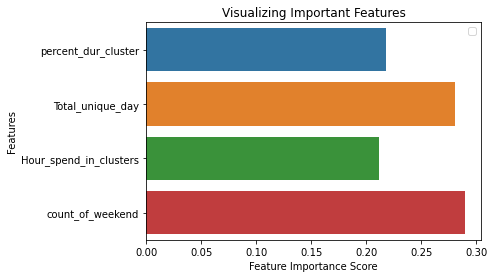

In [339]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=rf.feature_importances_, y=x.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [340]:
from sklearn.metrics import classification_report
y_pred=rf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        81
           1       0.83      0.70      0.76        54

    accuracy                           0.82       135
   macro avg       0.82      0.80      0.81       135
weighted avg       0.82      0.82      0.82       135



In [341]:
#y_pred=dtc.predict(X_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[73,  8],
       [16, 38]], dtype=int64)

In [284]:
y_pred=rf.predict(X)


In [285]:
Pred['Classification_Tag']=y_pred

In [286]:
Pred.Classification_Tag =Pred.Classification_Tag.replace({0:'Home',1:'Work'})

In [287]:
y_pred=rf.predict_proba(X)
y_hats = pd.DataFrame(y_pred)

In [288]:
home_work_Pred = pd.merge(Pred,y_hats,how = 'left',left_index = True, right_index = True)
home_work_Pred=home_work_Pred.rename(columns={0:'Home_prob',1:'work_prob'})

In [289]:
#home_work_Pred.to_csv(r'Z:\Sachin\lwp\test data\prediction_on_445_user_data.csv', index = False)

In [290]:
merge_with_bit_pattren=pd.merge(home_work_Pred,bit_Map_pattern,on=['imsi','clusters'],how='inner')

In [291]:
#merge_with_bit_pattren.to_csv(r'Z:\Sachin\lwp\435 User data\Random_forest_prediction_on_435_user_data_all_features_v7.csv', index = False)

In [292]:
merge_with_bit_pattren[merge_with_bit_pattren['imsi']=='51uk5.PbO7ZvDDnU35enwM4lyTUBHlP5XNTKMIiTO6udtTMYBxeC50sCnYmxQhUZ']

,imsi,clusters,percent_dur_cluster,Total_unique_day,count_of_weekend,Hour_spend_in_clusters,hamming_similarity_Home,hamming_similarity_Work,Classification_Tag,Home_prob,...,14,15,16,17,18,19,20,21,22,23
81,51uk5.PbO7ZvDDnU35enwM4lyTUBHlP5XNTKMIiTO6udtT...,11.0,0.390762,0.428571,NaN,0.318182,0.875000,0.250000,Work,0.224644,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,51uk5.PbO7ZvDDnU35enwM4lyTUBHlP5XNTKMIiTO6udtT...,1007.0,0.609238,0.857143,0.714286,0.681818,0.291667,0.583333,Home,0.722300,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [293]:
cosine_similarity_OP.imsi.nunique()

451

In [294]:
cosine_similarity_OP.head(2)

,index,imsi,clusters,0,1,2,3,4,5,6,...,15,16,17,18,19,20,21,22,23,cosine_cluster
0,0,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,1,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [295]:
filter_pred_data=home_work_Pred[['imsi', 'clusters', 'Classification_Tag','Home_prob','work_prob']]

pred_data2=home_work_Pred[['imsi']]

In [296]:
bit_Map_pattern_with_feature_Pred=pd.merge(cosine_similarity_OP,filter_pred_data,on=(['imsi', 'clusters',]),how='left')

In [297]:
df_final2=pd.merge(bit_Map_pattern_with_feature_Pred,pred_data2,on=(['imsi']),how='left')

In [298]:
Data_for_similarity_check=df_final2.drop_duplicates()

In [299]:
Data_for_similarity_check.head(2)

,index,imsi,clusters,0,1,2,3,4,5,6,...,18,19,20,21,22,23,cosine_cluster,Classification_Tag,Home_prob,work_prob
0,0,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Home,0.960386,0.039614
2,1,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Work,0.035058,0.964942


In [300]:
# for final tagging
cosine_Output=Data_for_similarity_check.copy()

a=cosine_Output['imsi'].unique()
final=pd.DataFrame()
for i in a:
    try:
        dfb=cosine_Output[(cosine_Output['imsi']==i)]
        b=dfb['cosine_cluster'].unique()
        for j in b:
                da=dfb[(dfb['cosine_cluster']==j)]
                da['cosine_tag']=da['Classification_Tag']
                if len(da['cosine_tag'].dropna().unique())<2:
                    if ((da['cosine_tag'].dropna().unique())=='Home'):
                        da['cosine_tag'].fillna('Secondary home',inplace=True)
                        final=pd.concat([final,da],axis=0)
                    elif ((da['cosine_tag'].dropna().unique())=='Work'):
                        da['cosine_tag'].fillna('Secondary Work',inplace=True)
                        final=pd.concat([final,da],axis=0)
                    else :
                        da['cosine_tag']='Hangout'
                        final=pd.concat([final,da],axis=0)
                else:
                    final=pd.concat([final,da],axis=0)
    except:
        print(i)
        print("a : " + a[i]+ "was not processed")

In [301]:
final.head(2)

,index,imsi,clusters,0,1,2,3,4,5,6,...,19,20,21,22,23,cosine_cluster,Classification_Tag,Home_prob,work_prob,cosine_tag
0,0,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,Home,0.960386,0.039614,Home
2,1,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,Work,0.035058,0.964942,Work


# Feature add for validation

In [302]:
cluster_data_join_with_squzzed.head(2)

,imsi,raster_latitude,partition_date,raster_longitude,sum_duration,hour_in,clusters,dayofweek,weekday_weekend,Count_of_Week
0,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.737331,2020-11-01,100.568793,1738.0,0,0.0,Sunday,weekend,44
1,+0FMKmXrCLUF44TDIwwoT4go7vplFGHuYbr8sD4sZmMGQp...,13.737331,2020-11-01,100.568793,4538.0,0,0.0,Sunday,weekend,44


In [303]:
cluster_data_join_with_squzzed.imsi.nunique()

451

In [304]:
# to get total_duration,Total_unique_day
all_cluster_feature=cluster_data_join_with_squzzed.groupby(['imsi','clusters']).agg(total_duration=('sum_duration','sum'),Total_unique_day=('partition_date','nunique')).reset_index()

In [305]:
top_lat_long_of_cluster=cluster_data_join_with_squzzed.groupby(['imsi','clusters','raster_latitude','raster_longitude']).agg(total_duration=('sum_duration','sum')).reset_index()

In [306]:
# median lat-long of cluster 
median_lat_long=cluster_data_join_with_squzzed.groupby(['imsi','clusters']).agg(lat_median=('raster_latitude','median'),
                                      long_median=('raster_longitude','median')).reset_index()

In [307]:
bit_data_hourly.imsi.nunique()

451

In [308]:
cluster_data_join_with_squzzed['partition_date']=pd.to_datetime(cluster_data_join_with_squzzed['partition_date'])
cluster_data_join_with_squzzed['Count_of_Week'] = cluster_data_join_with_squzzed['partition_date'].dt.week
Count_of_Week = cluster_data_join_with_squzzed.groupby(['imsi','clusters'])['Count_of_Week'].nunique().reset_index()

In [309]:

filtred_cluster_data_join_with_squzzed=cluster_data_join_with_squzzed[['imsi','partition_date','dayofweek','weekday_weekend','clusters']]


squeez_weekend=filtred_cluster_data_join_with_squzzed[(filtred_cluster_data_join_with_squzzed['weekday_weekend']=='weekend')]
squeez_weekend.drop_duplicates(inplace=True)
squeez_weekend.reset_index(drop=True,inplace=True)

# to get weekday count
squeez_weekend_agg=squeez_weekend.groupby(['imsi','clusters','weekday_weekend'])['weekday_weekend'].count().unstack(-1).fillna(0).add_prefix('count_of_')
squeez_weekend_agg.reset_index(drop=False,inplace=True)
# to get weekend count

In [310]:
Cluster_size=Cluster_size[['imsi', 'new_cluster','distance(Km)']]
Cluster_size=Cluster_size.rename(columns={'new_cluster':'clusters'})

KeyError: "['new_cluster'] not in index"

In [311]:
final.shape,median_lat_long.shape,all_cluster_feature.shape,bit_data_hourly.shape,Count_of_Week.shape,squeez_weekend_agg.shape,Cluster_size.shape

((1266, 32), (1266, 4), (1266, 4), (1266, 3), (1266, 3), (1047, 3), (1266, 3))

In [312]:
#Join all features,bit_Map_pattern & median_lat_long

dfs=(final,median_lat_long,all_cluster_feature,bit_data_hourly,Count_of_Week,Cluster_size)
group_names=['imsi','clusters']


from functools import reduce
bit_Map_pattern_with_feature = reduce(lambda left,right: pd.merge(left,right,on=group_names), dfs)

In [313]:
data_for_validation=pd.merge(bit_Map_pattern_with_feature,squeez_weekend_agg,on=('imsi','clusters'),how='left')

In [314]:
data_for_validation.to_csv(r'Z:\Sachin\lwp\435 User data\final_output_v4.csv', index = False)